In [207]:
# The path can also be read from a config file, etc.
OPENSLIDE_PATH = r"C:\Users\Snehal Patel\OneDrive - SimBioSys\Test folder\openslide-win64-20230414\bin"

import os
if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide



from pprint import pprint
import matplotlib.pyplot as plt

from tiatoolbox.tools import stainnorm
from tiatoolbox.wsicore.wsireader import WSIReader

In [191]:
file_path = r"C:\Users\Snehal Patel\Desktop\Cedars H&E\Slides\CSMC-01   c1b918a1-0961-3cda-be02-e59c87a3130d_123259.svs"

reader = WSIReader.open(file_path)
thumbnail = reader.slide_thumbnail(resolution=2, units="level")

mask_reader = reader.tissue_mask(resolution=2, units="level")
mask_thumbnail = mask_reader.slide_thumbnail(resolution=2, units="level")

In [192]:
pprint(reader.info.as_dict())
pprint(mask_reader.info.as_dict())

{'axes': 'YXS',
 'file_path': WindowsPath('C:/Users/Snehal Patel/Desktop/Cedars H&E/Slides/CSMC-01   c1b918a1-0961-3cda-be02-e59c87a3130d_123259.svs'),
 'level_count': 3,
 'level_dimensions': ((83722, 38761), (20930, 9690), (5232, 2422)),
 'level_downsamples': [1.0, 4.000099377895851, 16.00281362611333],
 'mpp': (0.262774, 0.262774),
 'objective_power': 40.0,
 'slide_dimensions': (83722, 38761),
 'vendor': 'aperio'}
{'axes': 'YXS',
 'file_path': WindowsPath('C:/Users/Snehal Patel/Desktop/Cedars H&E/Slides/CSMC-01   c1b918a1-0961-3cda-be02-e59c87a3130d_123259.svs'),
 'level_count': 3,
 'level_dimensions': ((83722, 38761), (20930, 9690), (5232, 2422)),
 'level_downsamples': [1.0, 4.000099377895851, 16.00281362611333],
 'mpp': (0.262774, 0.262774),
 'objective_power': 40.0,
 'slide_dimensions': (83722, 38761),
 'vendor': 'aperio'}


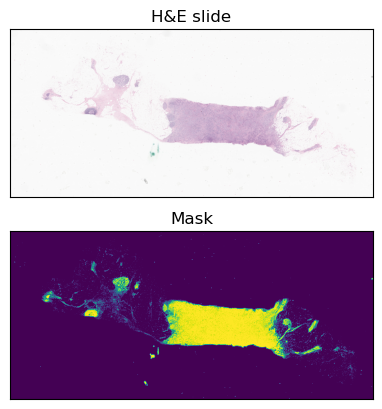

In [193]:
fig, ax = plt.subplots(nrows=2, ncols=1)

for i, img in enumerate([thumbnail, mask_thumbnail]):
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    if i == 0:
        ax[i].set_title("H&E slide")
    else:
        ax[i].set_title("Mask")


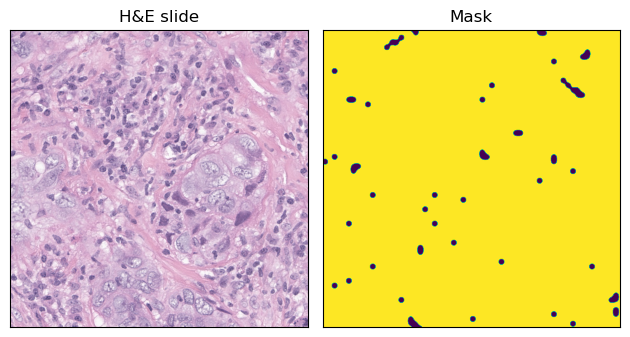

In [197]:
location = (55000, 20000)
size = (1000, 1000)

target_image = reader.read_rect(location=location, size=size, resolution=0, units="level")
target_mask = mask_reader.read_rect(location=location, size=size, resolution=0, units="level")

fig, ax = plt.subplots(nrows=1, ncols=2)

for i, img in enumerate([target_image, target_mask]):
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    if i == 0:
        ax[i].set_title("H&E slide")
    else:
        ax[i].set_title("Mask")
    plt.tight_layout()

In [ ]:
location = (25000, 20000)
size = (1000, 1000)

sample = reader.read_rect(location=location, size=size, resolution=0, units="level")
plt.yticks([])
plt.xticks([])
plt.title("sample")
plt.imshow(sample)
plt.tight_layout()

ValueError: assignment destination is read-only

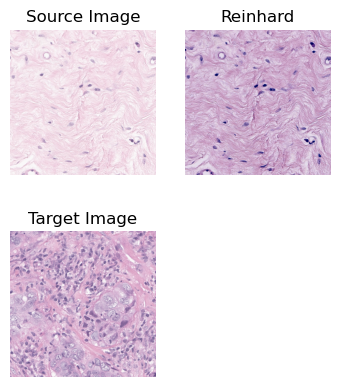

In [229]:
method_name_list = ["Reinhard", "Ruifrok", "Macenko", "Vahadane"]

plt.subplot(2, 3, 1)
plt.imshow(sample)
plt.title("Source Image")
plt.axis("off")
plt.subplot(2, 3, 4)
plt.imshow(target_image)
plt.title("Target Image")
plt.axis("off")

pos = [2, 3, 5, 6]
for idx, method_name in enumerate(method_name_list):
    stain_normalizer = stainnorm.get_normalizer(method_name)
    stain_normalizer.fit(target_image)

    normed_sample = stain_normalizer.transform(sample.copy())
    plt.subplot(2, 3, pos[idx])
    plt.imshow(normed_sample)
    plt.title(method_name)
    plt.axis("off")
plt.tight_layout()
plt.show()